In [1]:
import sys
import os

import pandas as pd
# import polars as pl

from matplotlib import pyplot as plt
%matplotlib inline  

sys.path.append('/Users/mihail/Documents/repos/analyzer')
print(sys.version)

from analyzer.plots import plot_var_stat, plot_cross_vars, PlotConfig
from analyzer.preprocessing import BinningParams

3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]


# Подготовка
Загрузим датафрейм, на котором продемонстрируем функционал.

In [2]:
df = pd.read_csv('/Users/mihail/Documents/repos/analyzer/tests/Titanic-Dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.shape

(891, 12)

In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Функционал

## PlotConfig
Конфигурация графиков.  
__Не все настройки применимы к разным типам графика.__

In [5]:
?PlotConfig

Init signature:
PlotConfig(
    style: Literal['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10'] = None,
    plot_size: Tuple[float, float] = None,
    colormap: str = None,
    color: str = None,
    color2: str = None,
    annotation_delta: float = None,
    annotation_font_size: float = None,
    title: str = None,
    title_size: float = 18,
    title_pad: float = 0.0,
    xlabel: str = '',
    xlabel_size: float = 15,
    xtick_size: float = 10,
    x_rotation: float 

## plot_var_stat
График для отображения статистики по переменной.

In [6]:
?plot_var_stat

Signature:
plot_var_stat(
    data: ~DataFrame,
    var_name: str,
    target_name: str = None,
    map_values: Dict[~OldValue, ~NewValue] = None,
    binning: Union[analyzer.preprocessing.binning.params.BinningParams, bool] = True,
    annotation: bool = True,
    plot_config: analyzer.plots.config.PlotConfig = None,
    _mark_bar=None,
) -> ~DataFrame
Docstring:
График для отображения статистики по переменной.

Args:
    data:               Исследуемый датафрейм
    var_name:           Название интересующей переменной
    target_name:        Опционально. Название таргета
    map_values:         Словарь для замены значений переменных (словарь старое-новое значение)
    binning:            Параметры для биннинга
    annotation:         Аннотация на графике
    plot_config:        Конфиг для графика
    _mark_bar:          Скрытый параметр. Название категории, столбце которой необходимо выделить.

Returns:
    * - Опциональные колонки, есть только при наличии таргета.
    DataFrame:
   

/Users/mihail/Documents/repos/analyzer/analyzer/utils/framework_depends/columns/set.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = series_or_value


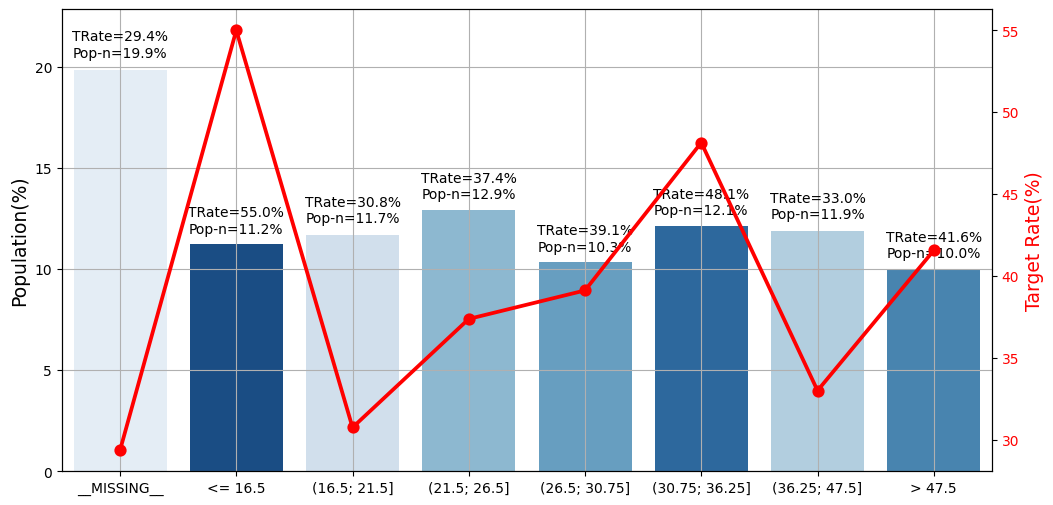

,VarName,Group,Count,Target,Population(%),TargetPopulation(%),TargetRate(%),GroupIV,TotalIV
0,Age,__MISSING__,177,52,19.87,15.20,29.378531,-3.054206,12.478764
1,Age,<= 16.5,100,55,11.22,16.08,55.000000,5.314263,12.478764
2,Age,(16.5; 21.5],104,32,11.67,9.36,30.769231,-1.268870,12.478764
3,Age,(21.5; 26.5],115,43,12.91,12.57,37.391304,-0.022846,12.478764
4,Age,(26.5; 30.75],92,36,10.33,10.53,39.130435,0.010253,12.478764
5,Age,(30.75; 36.25],108,52,12.12,15.20,48.148148,1.997621,12.478764
6,Age,(36.25; 47.5],106,35,11.90,10.23,33.018868,-0.631612,12.478764
7,Age,> 47.5,89,37,9.99,10.82,41.573034,0.179093,12.478764


In [7]:
plot_var_stat(df, var_name='Age', target_name='Survived', binning=BinningParams(min_prc=10))

/Users/mihail/Documents/repos/analyzer/analyzer/utils/framework_depends/columns/set.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = series_or_value
/Users/mihail/Documents/repos/analyzer/analyzer/stats/counts.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(var_name, as_index=False).size()


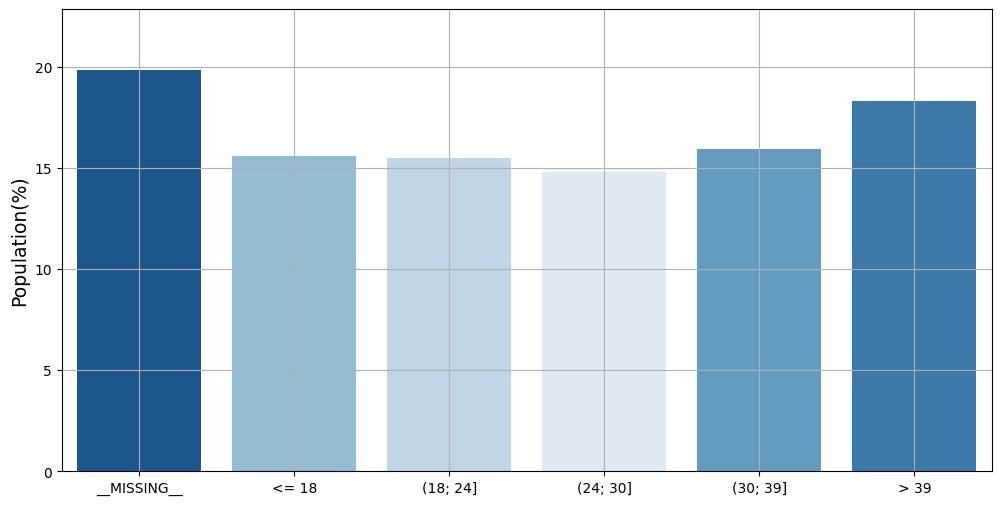

,Group,Total,Population(%)
0,__MISSING__,177,19.87
1,<= 18,139,15.60
2,(18; 24],138,15.49
3,(24; 30],132,14.81
4,(30; 39],142,15.94
5,> 39,163,18.29


In [8]:
plot_var_stat(df, var_name='Age', binning=True, annotation=False)

__Возможные настройки для этого типа графика:__
- style
- plot_size
- Цвета:
    - colormap, палитра для столбцов
    - color, Цвет столбцов буде одинаковый и заданного цвета.
    - color2, Цвет кривой Target Rate будет заданного цвета
- Аннотации (annotation_delta, annotation_font_size)
- Название графика (title, title_size, title_pad)
- Настройки оси Х (xlabel, xlabel_size, xtick_size, x_rotation, x_grid)
- Настройки оси Y (ylabel, ylabel_size, ytick_size, y_rotation, y_grid, ymax, ymin)
- Настройки оси Y2 (y2label, y2_grid, y2max, y2min)
- grid_widths
- bar_width

Настройка позволит дотюнить график до подходящего качества для презентации.

/Users/mihail/Documents/repos/analyzer/analyzer/utils/framework_depends/columns/set.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = series_or_value
/Users/mihail/Documents/repos/analyzer/analyzer/plots/var_stat/_image.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=config.x_rotation)


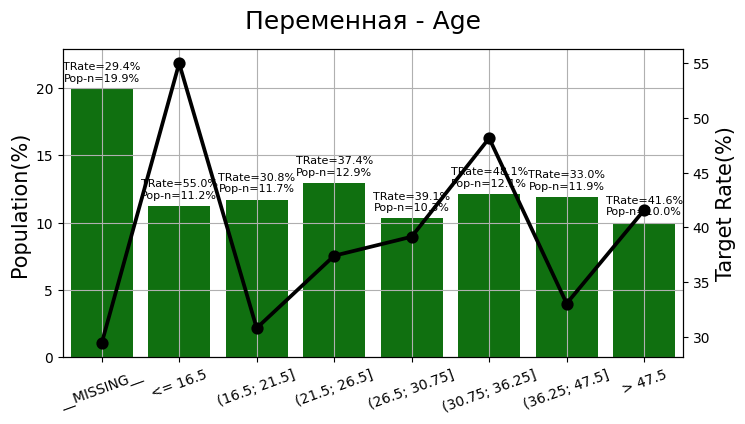

,VarName,Group,Count,Target,Population(%),TargetPopulation(%),TargetRate(%),GroupIV,TotalIV
0,Age,__MISSING__,177,52,19.87,15.20,29.378531,-3.054206,12.478764
1,Age,<= 16.5,100,55,11.22,16.08,55.000000,5.314263,12.478764
2,Age,(16.5; 21.5],104,32,11.67,9.36,30.769231,-1.268870,12.478764
3,Age,(21.5; 26.5],115,43,12.91,12.57,37.391304,-0.022846,12.478764
4,Age,(26.5; 30.75],92,36,10.33,10.53,39.130435,0.010253,12.478764
5,Age,(30.75; 36.25],108,52,12.12,15.20,48.148148,1.997621,12.478764
6,Age,(36.25; 47.5],106,35,11.90,10.23,33.018868,-0.631612,12.478764
7,Age,> 47.5,89,37,9.99,10.82,41.573034,0.179093,12.478764


In [9]:
plot_conf = PlotConfig(plot_size=(8,4), title='Переменная - Age', color='Green', color2='Black', x_rotation=20, annotation_font_size=8)
plot_var_stat(df, var_name='Age', target_name='Survived', binning=BinningParams(min_prc=10), plot_config=plot_conf)

## plot_cross_vars
График отображения кросс-статистки по двум переменным.

In [10]:
?plot_cross_vars

Signature:
plot_cross_vars(
    data: ~DataFrame,
    var_name_1: str,
    var_name_2: str,
    target_name: str = None,
    map_values: Dict[~Variable, Dict[~OldValue, ~NewValue]] = None,
    binning: Union[Dict[str, Union[analyzer.preprocessing.binning.params.BinningParams, bool]], bool, analyzer.preprocessing.binning.params.BinningParams, List[str]] = True,
    histogram: bool = True,
    colorbar: bool = True,
    annotation: bool = True,
    plot_config: analyzer.plots.config.PlotConfig = None,
    min_population: float = 0,
    circles: bool = False,
    _resize: bool = True,
) -> ~DataFrame
Docstring:
График отображения кросс-статистки по двум переменным.

Args:
    data:                       Исследуемый датафрейм
    var_name_1:                 Название первой интересующей переменной
    var_name_2:                 Название второй интересующей переменной
    target_name:                Опционально. Название таргета
    map_values:                 Словарь для замены значений пе

/Users/mihail/Documents/repos/analyzer/analyzer/utils/framework_depends/columns/set.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = series_or_value
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Бинаризация переменных, 2/2 [00:00<00:00, 112.61it/s]


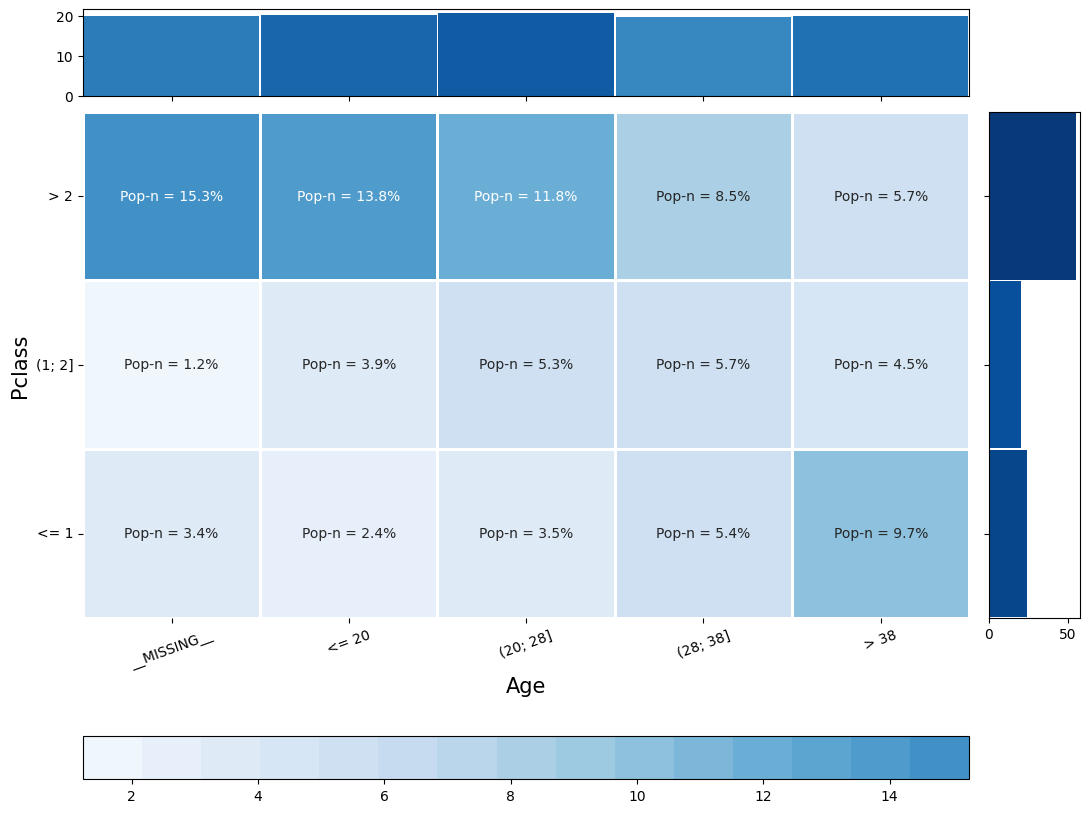

,Age,Pclass,Count,Population(%)
0,__MISSING__,<= 1,30,3.37
1,__MISSING__,(1; 2],11,1.23
2,__MISSING__,> 2,136,15.26
3,<= 20,<= 1,21,2.36
4,<= 20,(1; 2],35,3.93
5,<= 20,> 2,123,13.80
6,(20; 28],<= 1,31,3.48
7,(20; 28],(1; 2],47,5.27
8,(20; 28],> 2,105,11.78
9,(28; 38],<= 1,48,5.39


In [16]:
plot_cross_vars(
        df, var_name_1='Age', var_name_2='Pclass',
        min_population=1.2,
        binning=BinningParams(min_prc=20)
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Бинаризация переменных, 2/2 [00:00<00:00, 131.32it/s]


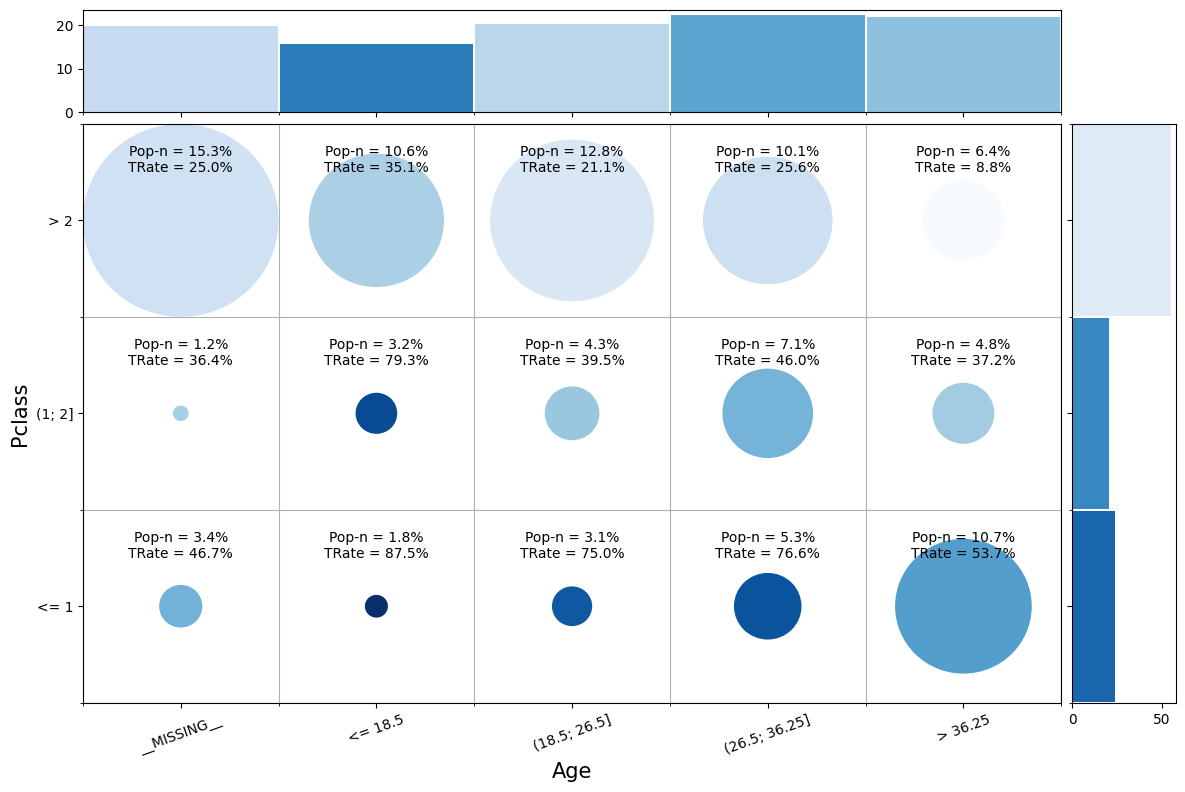

,Age,Pclass,Count,Population(%),Target,TargetRate(%),TargetPopulation(%),GroupIV,ParentMin,ParentMin TR(%),ParentMax,ParentMax TR(%)
0,__MISSING__,<= 1,30,3.37,14,46.666667,4.09,0.400633,- Pclass,29.378531,- Age,62.962963
1,__MISSING__,(1; 2],11,1.23,4,36.363636,1.17,-0.009104,- Pclass,29.378531,- Age,47.282609
2,__MISSING__,> 2,136,15.26,34,25.000000,9.94,-5.401375,- Age,24.236253,- Pclass,29.378531
3,<= 18.5,<= 1,16,1.80,14,87.500000,4.09,9.021838,- Pclass,50.359712,- Age,62.962963
4,<= 18.5,(1; 2],29,3.25,23,79.310345,6.73,10.233925,- Age,47.282609,- Pclass,50.359712
5,<= 18.5,> 2,94,10.55,33,35.106383,9.65,-0.206255,- Age,24.236253,- Pclass,50.359712
6,(18.5; 26.5],<= 1,28,3.14,21,75.000000,6.14,7.647773,- Pclass,33.333333,- Age,62.962963
7,(18.5; 26.5],(1; 2],38,4.26,15,39.473684,4.39,0.009010,- Pclass,33.333333,- Age,47.282609
8,(18.5; 26.5],> 2,114,12.79,24,21.052632,7.02,-7.955151,- Age,24.236253,- Pclass,33.333333
9,(26.5; 36.25],<= 1,47,5.27,36,76.595745,10.53,14.138359,- Pclass,44.000000,- Age,62.962963


In [13]:
plot_cross_vars(
        df, var_name_1='Age', var_name_2='Pclass', target_name='Survived',
        min_population=1.2,
        binning=True,
        circles=True, 
        colorbar=False
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Бинаризация переменных, 2/2 [00:00<00:00, 121.06it/s]


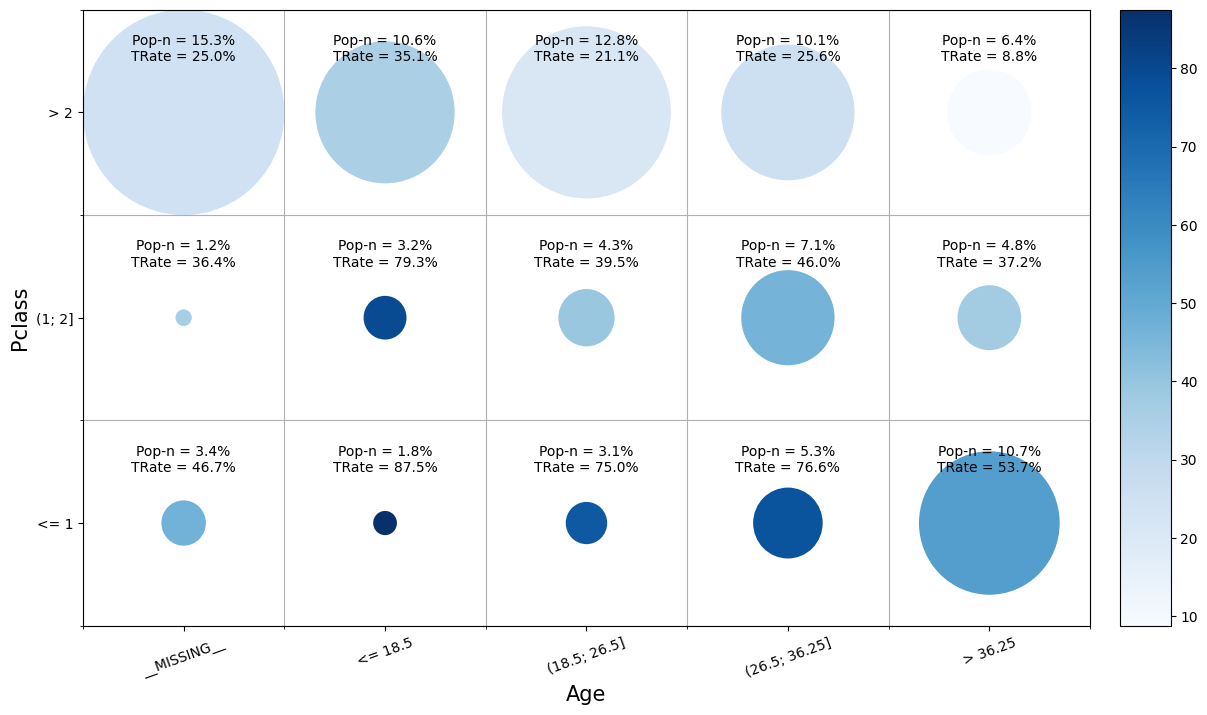

,Age,Pclass,Count,Population(%),Target,TargetRate(%),TargetPopulation(%),GroupIV,ParentMin,ParentMin TR(%),ParentMax,ParentMax TR(%)
0,__MISSING__,<= 1,30,3.37,14,46.666667,4.09,0.400633,- Pclass,29.378531,- Age,62.962963
1,__MISSING__,(1; 2],11,1.23,4,36.363636,1.17,-0.009104,- Pclass,29.378531,- Age,47.282609
2,__MISSING__,> 2,136,15.26,34,25.000000,9.94,-5.401375,- Age,24.236253,- Pclass,29.378531
3,<= 18.5,<= 1,16,1.80,14,87.500000,4.09,9.021838,- Pclass,50.359712,- Age,62.962963
4,<= 18.5,(1; 2],29,3.25,23,79.310345,6.73,10.233925,- Age,47.282609,- Pclass,50.359712
5,<= 18.5,> 2,94,10.55,33,35.106383,9.65,-0.206255,- Age,24.236253,- Pclass,50.359712
6,(18.5; 26.5],<= 1,28,3.14,21,75.000000,6.14,7.647773,- Pclass,33.333333,- Age,62.962963
7,(18.5; 26.5],(1; 2],38,4.26,15,39.473684,4.39,0.009010,- Pclass,33.333333,- Age,47.282609
8,(18.5; 26.5],> 2,114,12.79,24,21.052632,7.02,-7.955151,- Age,24.236253,- Pclass,33.333333
9,(26.5; 36.25],<= 1,47,5.27,36,76.595745,10.53,14.138359,- Pclass,44.000000,- Age,62.962963


In [14]:
plot_cross_vars(
        df, var_name_1='Age', var_name_2='Pclass', target_name='Survived',
        min_population=1.2,
        binning=True,
        circles=True, 
        histogram=False
    )

__Возможные настройки для этого типа графика:__
- style
- plot_size
- colormap
- Аннотации (annotation_delta, annotation_font_size)
- Название графика (title, title_size, title_pad)
- Настройки оси Х (xlabel, xlabel_size, xtick_size, x_rotation)
- Настройки оси Y (ylabel, ylabel_size, ytick_size, y_rotation)
- grid_widths
- Настройки гистограмм (bar_width, side_grid)
- Пропорции частей графика (columns_ratios, rows_ratios, empty_space)
- Настроки колорбара (cbar_location, cbar_width, cbar_pad)

Настройка позволит дотюнить график до подходящего качества для презентации.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| Бинаризация переменных, 2/2 [00:00<00:00, 127.00it/s]


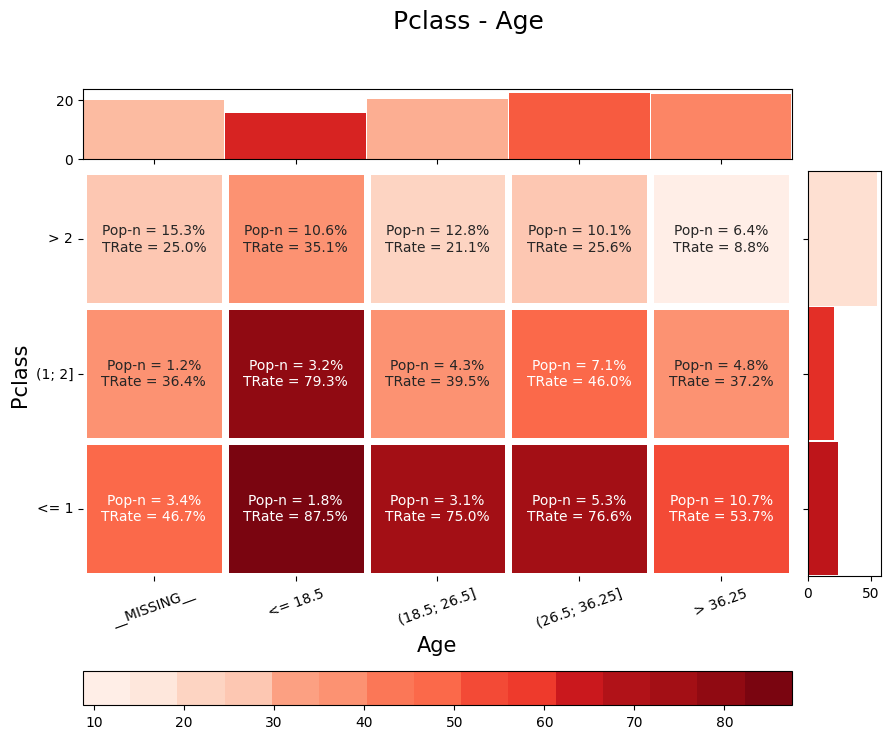

,Age,Pclass,Count,Population(%),Target,TargetRate(%),TargetPopulation(%),GroupIV,ParentMin,ParentMin TR(%),ParentMax,ParentMax TR(%)
0,__MISSING__,<= 1,30,3.37,14,46.666667,4.09,0.400633,- Pclass,29.378531,- Age,62.962963
1,__MISSING__,(1; 2],11,1.23,4,36.363636,1.17,-0.009104,- Pclass,29.378531,- Age,47.282609
2,__MISSING__,> 2,136,15.26,34,25.000000,9.94,-5.401375,- Age,24.236253,- Pclass,29.378531
3,<= 18.5,<= 1,16,1.80,14,87.500000,4.09,9.021838,- Pclass,50.359712,- Age,62.962963
4,<= 18.5,(1; 2],29,3.25,23,79.310345,6.73,10.233925,- Age,47.282609,- Pclass,50.359712
5,<= 18.5,> 2,94,10.55,33,35.106383,9.65,-0.206255,- Age,24.236253,- Pclass,50.359712
6,(18.5; 26.5],<= 1,28,3.14,21,75.000000,6.14,7.647773,- Pclass,33.333333,- Age,62.962963
7,(18.5; 26.5],(1; 2],38,4.26,15,39.473684,4.39,0.009010,- Pclass,33.333333,- Age,47.282609
8,(18.5; 26.5],> 2,114,12.79,24,21.052632,7.02,-7.955151,- Age,24.236253,- Pclass,33.333333
9,(26.5; 36.25],<= 1,47,5.27,36,76.595745,10.53,14.138359,- Pclass,44.000000,- Age,62.962963


In [21]:
plot_conf = PlotConfig(plot_size=(10,8), title='Pclass - Age', colormap='Reds', grid_widths=5)
plot_cross_vars(
        df, var_name_1='Age', var_name_2='Pclass', target_name='Survived',
        min_population=1.2,
        binning=True,
        circles=False, 
        histogram=True,
        plot_config=plot_conf
    )